Processing 00000.jpg ...


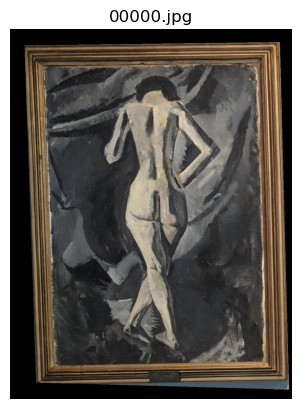

Processing 00001.jpg ...


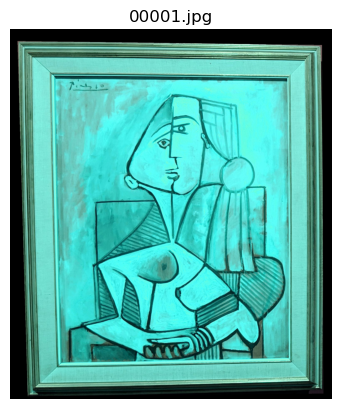

Processing 00002.jpg ...


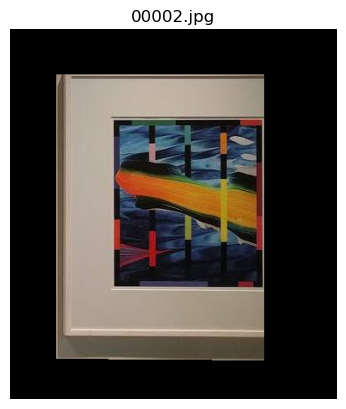

Processing 00003.jpg ...


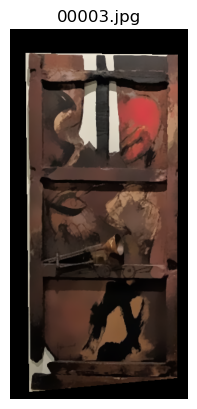

Processing 00004.jpg ...


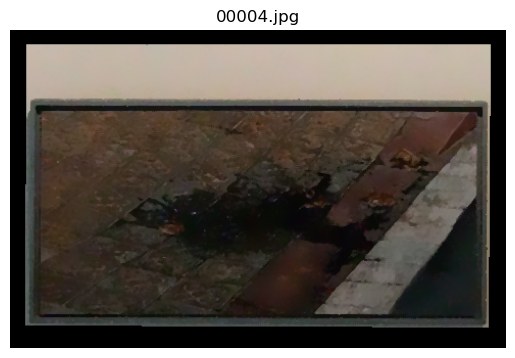

Processing 00005.jpg ...


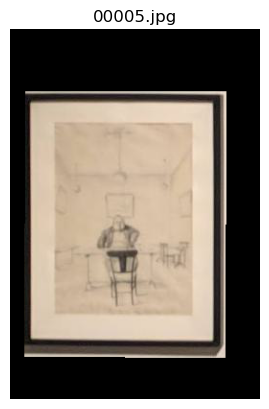

Processing 00006.jpg ...


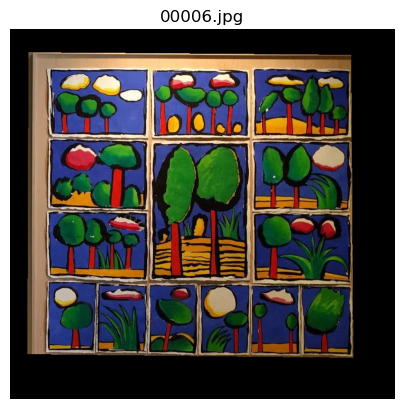

Processing 00007.jpg ...


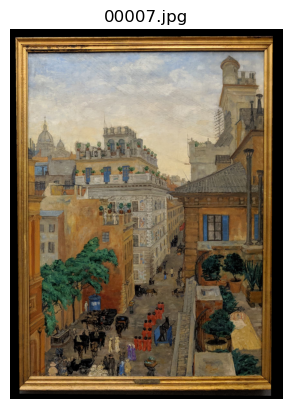

Processing 00008.jpg ...


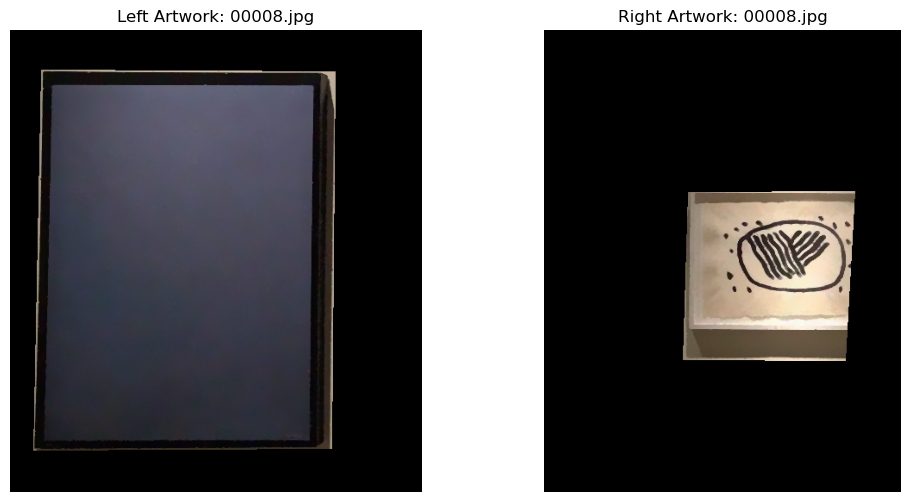

Processing 00009.jpg ...


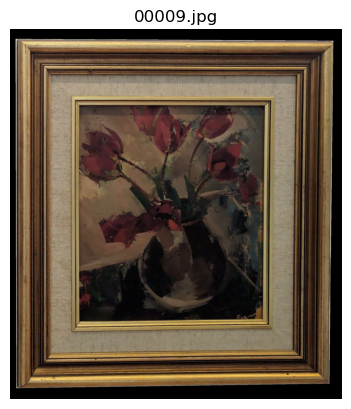

Processing 00010.jpg ...


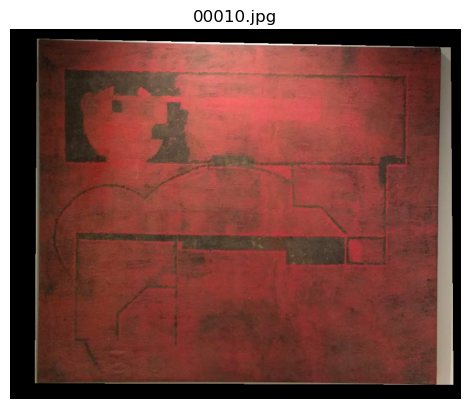

Processing 00011.jpg ...


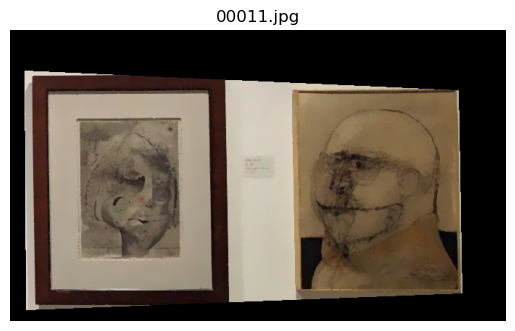

Processing 00012.jpg ...


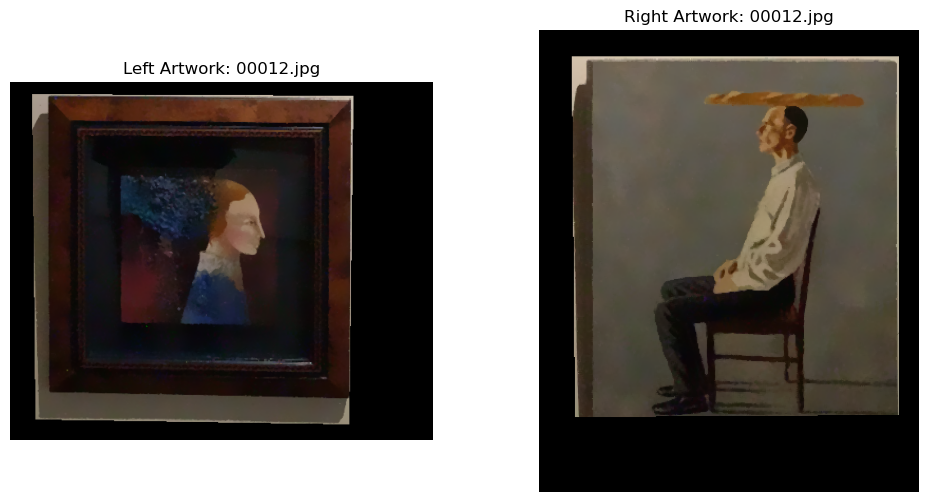

Processing 00013.jpg ...


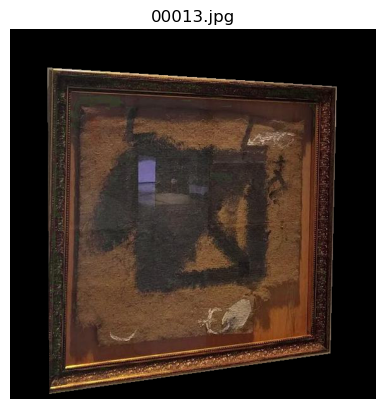

Processing 00014.jpg ...


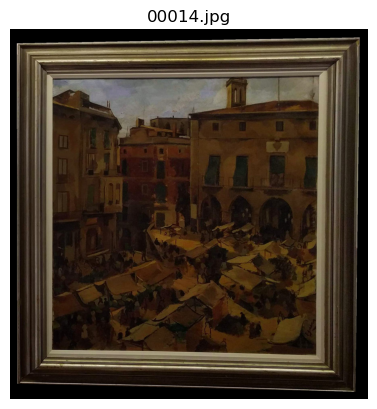

Processing 00015.jpg ...


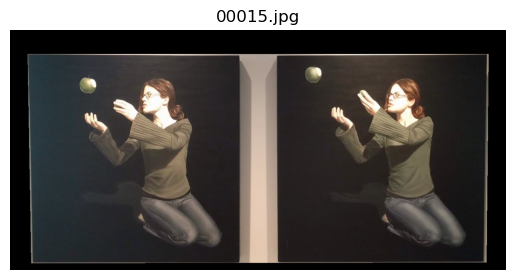

Processing 00016.jpg ...


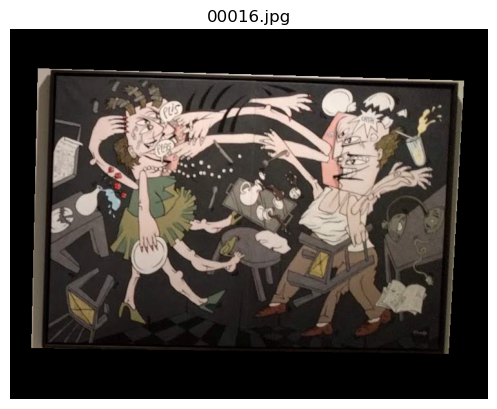

Processing 00017.jpg ...


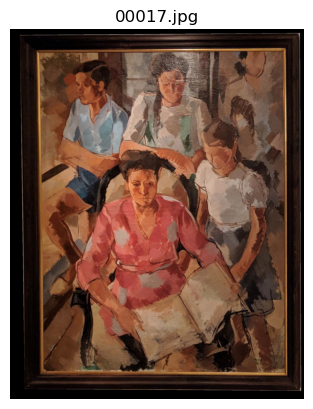

Processing 00018.jpg ...


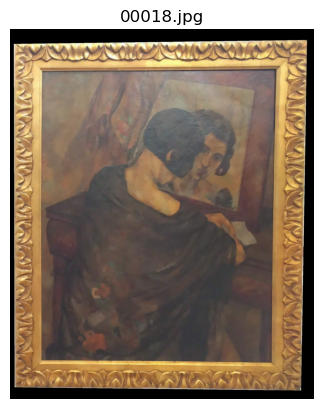

Processing 00019.jpg ...


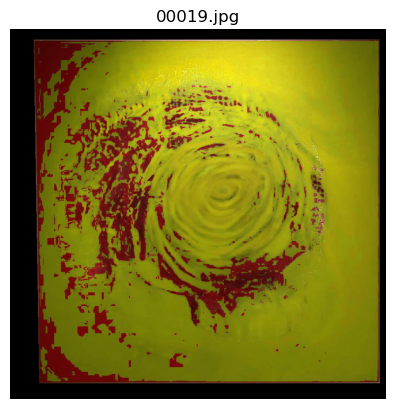

Processing 00020.jpg ...


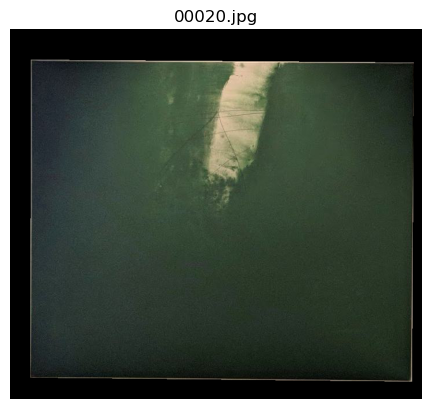

Processing 00021.jpg ...


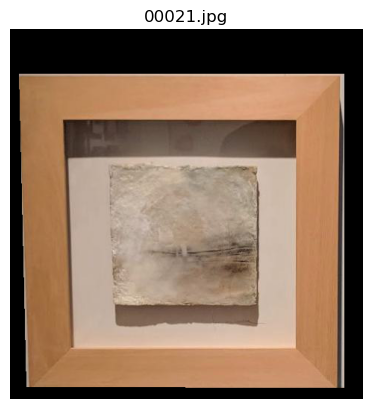

Processing 00022.jpg ...


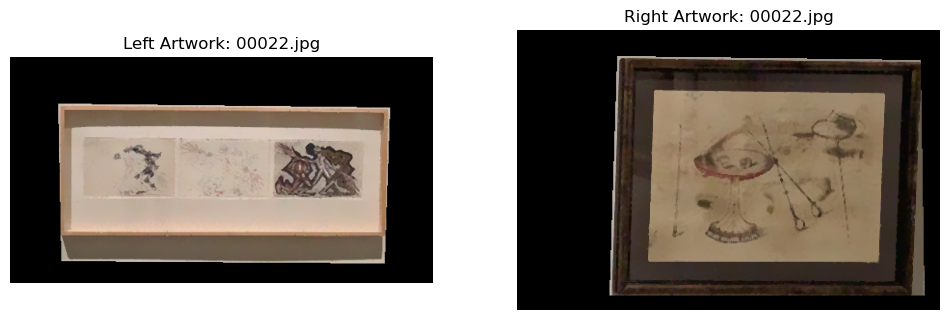

Processing 00023.jpg ...


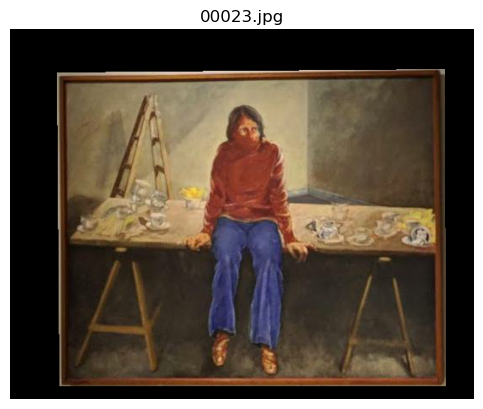

Processing 00024.jpg ...


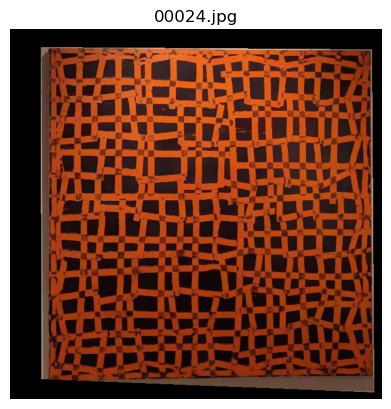

Processing 00025.jpg ...


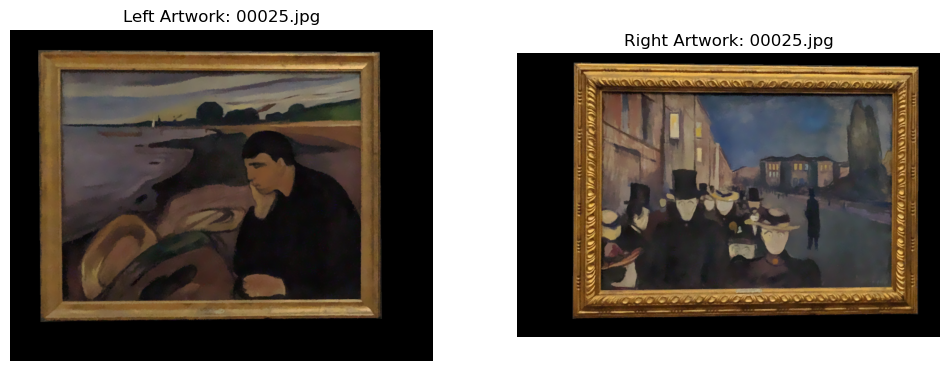

Processing 00026.jpg ...


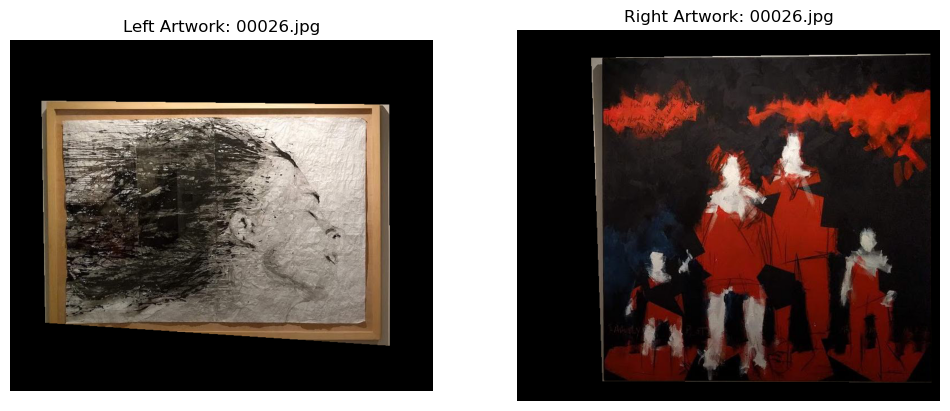

Processing 00027.jpg ...


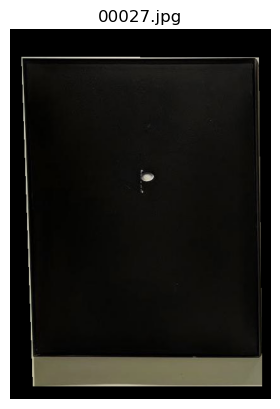

Processing 00028.jpg ...


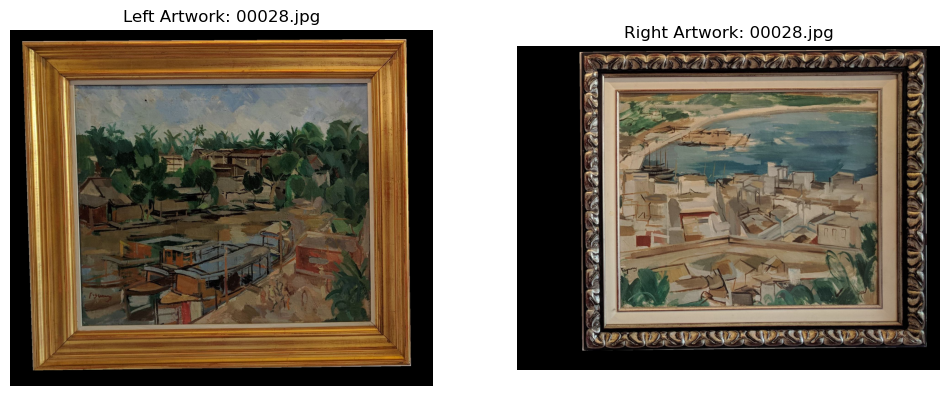

Processing 00029.jpg ...


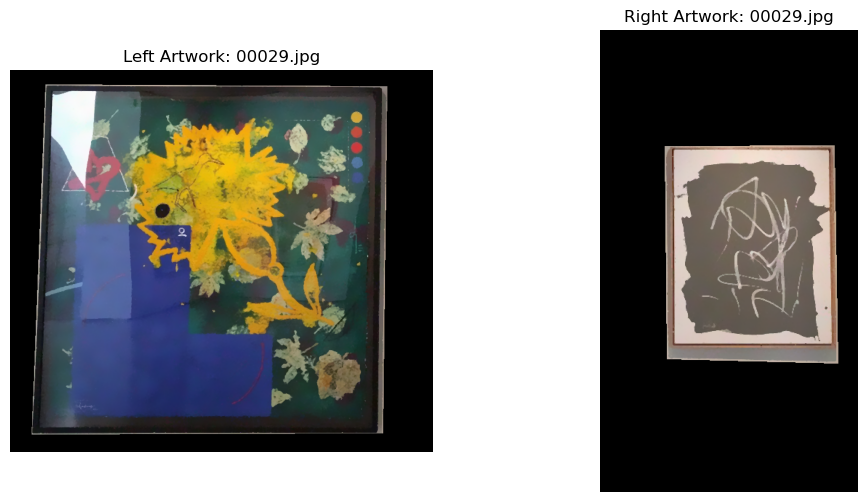

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from background_removal_exp import background_remover_w2 as background_remover
from descriptors import preprocess_image
from image_split import split_images

# Path to your new dataset
IMG_FOLDER = "../Data/Week3/qst2_w3/"

def process_images(img_folder):
    """Process all images in the folder."""
    image_names = sorted([f for f in os.listdir(img_folder) if f.endswith('.jpg')])

    for img_name in image_names:
        print(f"Processing {img_name} ...")
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"⚠️ Skipping {img_name}: could not read image.")
            continue

        # --- Separación de imágenes ---
        valleys, splitted = split_images(img, 800)

        # --- Evaluación y visualización ---
        if isinstance(splitted, tuple):
            left_artwork, right_artwork = splitted

            left_artwork = preprocess_image(left_artwork)
            right_artwork = preprocess_image(right_artwork)

            _, left_mask, left_output, _ = background_remover.remove_background_morphological_gradient(left_artwork)
            _, right_mask, right_output, _ = background_remover.remove_background_morphological_gradient(right_artwork)

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(left_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Left Artwork: {img_name}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(right_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Right Artwork: {img_name}")
            plt.axis('off')

        else:
            img = preprocess_image(splitted)
            _, mask, output, _ = background_remover.remove_background_morphological_gradient(img)

            plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            plt.title(f"{img_name}")
            plt.axis('off')

        plt.show()

# Run the function
process_images(IMG_FOLDER)